Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [3]:
train_data.head()

,ID,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,...,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender,Target
0,ID_3CFL0U,eswatini,63.0,Yes,No,No,No,Yes,3000.0,6000.0,...,Never had,Never had,NaN,6.0,Never had,Used to have but don’t have now,NaN,Never had,Never had,Low
1,ID_XWI7G3,zimbabwe,39.0,No,Yes,Yes,No,Yes,NaN,NaN,...,NaN,NaN,No,3.0,Never had,Never had,NaN,NaN,NaN,Medium
2,ID_TY93LV,malawi,34.0,Don’t know or N/A,No,No,Don't know,Yes,30000.0,6000.0,...,Never had,Never had,Yes,NaN,NaN,NaN,Yes,NaN,NaN,Low
3,ID_9OP2C8,malawi,28.0,Yes,No,No,No,No,180000.0,60000.0,...,Never had,Never had,No,NaN,NaN,NaN,Yes,Never had,Have now,Low
4,ID_13REYS,zimbabwe,43.0,Yes,No,No,Yes,Yes,50.0,2400.0,...,NaN,NaN,No,0.0,Never had,Never had,Yes,NaN,NaN,Low


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   object 
 2   owner_age                                                         9618 non-null   float64
 3   attitude_stable_business_environment                              9616 non-null   object 
 4   attitude_worried_shutdown                                         9616 non-null   object 
 5   compliance_income_tax                                             9614 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          9613 non-null   object 
 7   perception_cannot_afford_insuranc

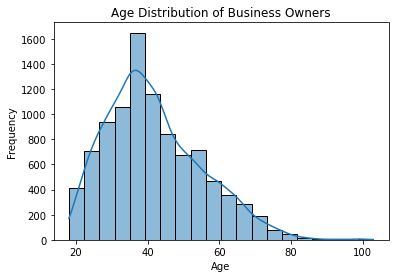

In [5]:
#plot age distributions of the country's business owners using a histogram

sns.histplot(train_data['owner_age'], bins=20, kde=True)
plt.title('Age Distribution of Business Owners')        
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


No handles with labels found to put in legend.


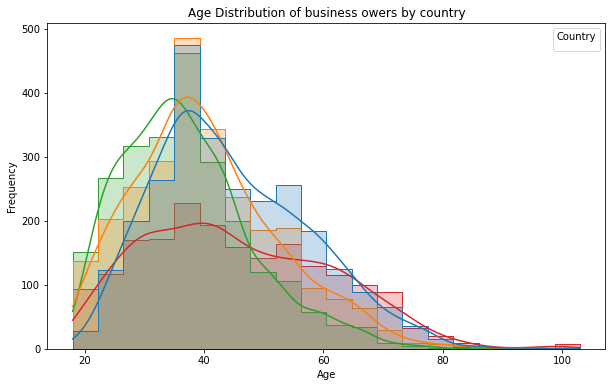

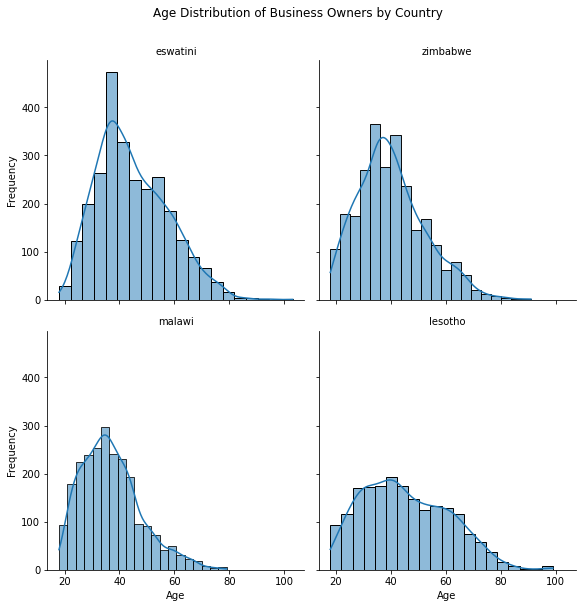

In [6]:
# compare the four countries
plt.figure(figsize=(10, 6))
sns.histplot(
    data= train_data,
    x ='owner_age',
    hue='country',
    bins=20,
    kde=True,
    element = 'step',
    stat= 'count',
    legend= True
)

plt.title('Age Distribution of business owers by country')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Country');


g = sns.FacetGrid(
    train_data,
    col='country',
    col_wrap=2,
    height=4,
    sharex=True,
    sharey=True
)

g.map(sns.histplot, 'owner_age', bins=20, kde=True)
g.set_axis_labels('Age', 'Frequency')
g.set_titles('{col_name}')
plt.suptitle('Age Distribution of Business Owners by Country', y=1.05)

plt.show()

Distribution of business age per country

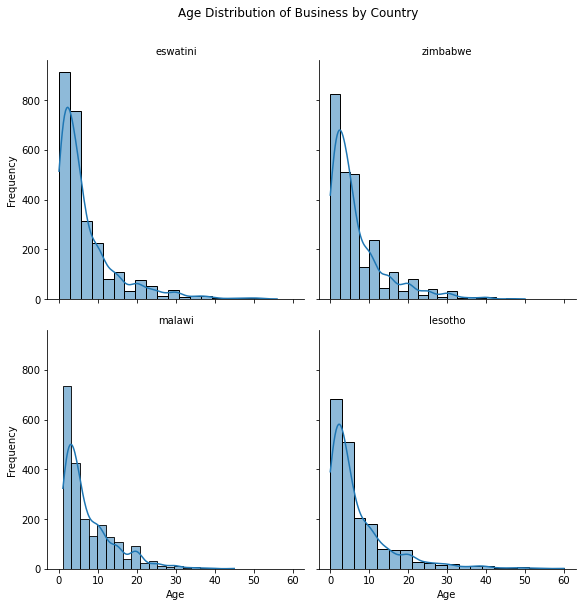

In [7]:
g = sns.FacetGrid(
    train_data,
    col='country',
    col_wrap=2,
    height=4,
    sharex=True,
    sharey=True
)

g.map(sns.histplot, 'business_age_years', bins=20, kde=True)
g.set_axis_labels('Age', 'Frequency')
g.set_titles('{col_name}')
plt.suptitle('Age Distribution of Business by Country', y=1.05)

plt.show()

In [8]:
#plot the FHI by the business age 
train_data['Target'].value_counts()

Low       6280
Medium    2868
High       470
Name: Target, dtype: int64

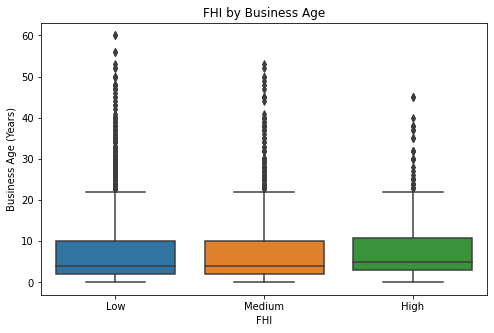

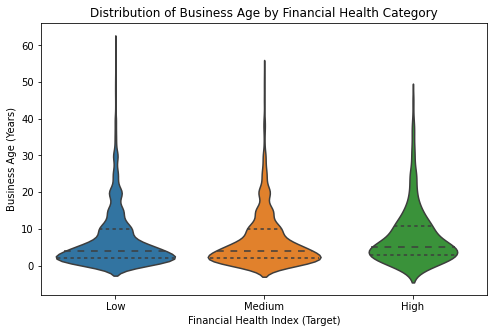

In [9]:
plt.figure(figsize = (8,5))

sns.boxplot(
    data = train_data,
    x= 'Target',
    y = 'business_age_years'
)

plt.title('FHI by Business Age')
plt.xlabel('FHI')
plt.ylabel('Business Age (Years)')  
plt.show()


plt.figure(figsize=(8, 5))
sns.violinplot(
    data=train_data,
    x='Target',
    y='business_age_years',
    inner='quartile'
)

plt.title('Distribution of Business Age by Financial Health Category')
plt.xlabel('Financial Health Index (Target)')
plt.ylabel('Business Age (Years)')
plt.show()

### 1. Inspect the Traget class for imbalance and distribution

In [10]:
train_data['Target'].value_counts(sort=True)

Low       6280
Medium    2868
High       470
Name: Target, dtype: int64

### Numerical Features Analysis 


NUMERICAL FEATURES ANALYSIS

Numerical Features (6):
['owner_age', 'personal_income', 'business_expenses', 'business_turnover', 'business_age_years', 'business_age_months']

Statistical Summary:
         owner_age  personal_income  business_expenses  business_turnover  \
count  9618.000000     9.509000e+03       9.389000e+03       9.402000e+03   
mean     41.705344     2.627345e+05       4.583838e+05       1.348210e+06   
std      13.314010     2.566268e+06       6.184746e+06       8.804741e+06   
min      18.000000     0.000000e+00       0.000000e+00       0.000000e+00   
25%      32.000000     3.000000e+02       7.000000e+02       1.500000e+03   
50%      40.000000     2.000000e+03       3.000000e+03       6.000000e+03   
75%      50.000000     2.500000e+04       2.500000e+04       5.000000e+04   
max     103.000000     1.500000e+08       5.000000e+08       4.200000e+08   

       business_age_years  business_age_months  
count         9366.000000          5507.000000  
mean        

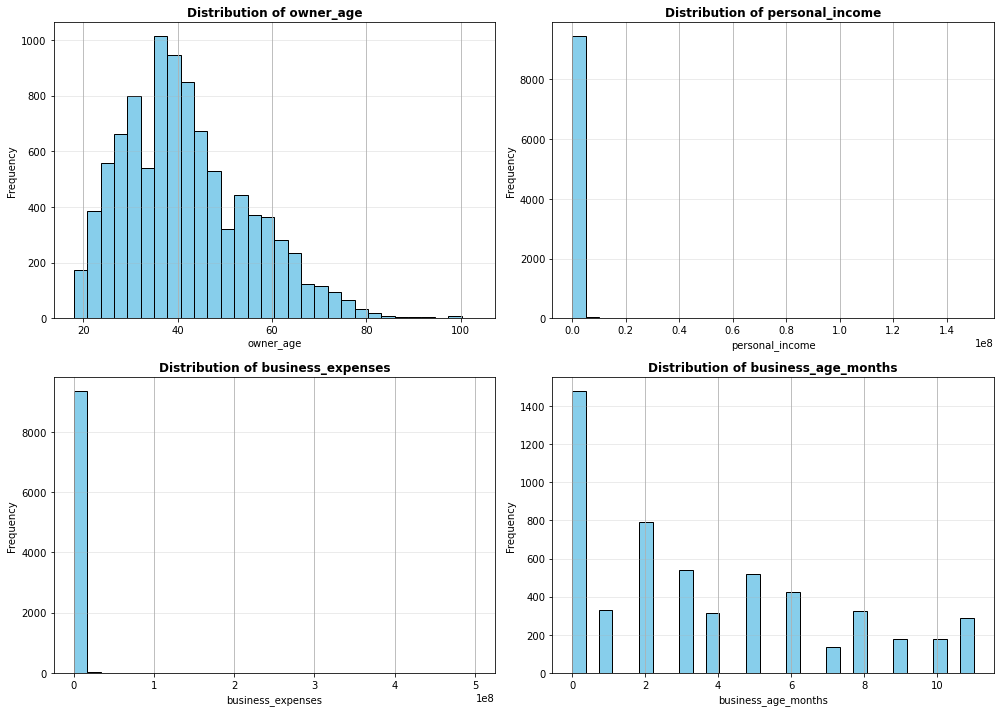

In [11]:
# ========================================
# 5. NUMERICAL FEATURES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 60)

# Identify numerical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Target' in numerical_cols:
    numerical_cols.remove('Target')

print(f"\nNumerical Features ({len(numerical_cols)}):")
print(numerical_cols)

# Statistical summary
print("\nStatistical Summary:")
print(train_data[numerical_cols].describe())

# Visualize distributions of key numerical features
key_numerical = ['owner_age', 'personal_income', 'business_expenses', 'business_age_months']
available_numerical = [col for col in key_numerical if col in train_data.columns]
if available_numerical:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()
    
    for idx, col in enumerate(available_numerical[:4]):
        train_data[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### Categorical Variables Analysis 


In [12]:
# ========================================
# 6. CATEGORICAL FEATURES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
if 'ID' in categorical_cols:
    categorical_cols.remove('ID')

print(f"\nCategorical Features ({len(categorical_cols)}):")
print(categorical_cols)

# Cardinality analysis
print("\nCardinality (Unique Values) for Categorical Features:")
cardinality_df = pd.DataFrame({
    'Feature': categorical_cols,
    'Unique_Values': [train_data[col].nunique() for col in categorical_cols]
}).sort_values('Unique_Values', ascending=False)
print(cardinality_df.to_string(index=False))


CATEGORICAL FEATURES ANALYSIS

Categorical Features (32):
['country', 'attitude_stable_business_environment', 'attitude_worried_shutdown', 'compliance_income_tax', 'perception_insurance_doesnt_cover_losses', 'perception_cannot_afford_insurance', 'motor_vehicle_insurance', 'has_mobile_money', 'current_problem_cash_flow', 'has_cellphone', 'owner_sex', 'offers_credit_to_customers', 'attitude_satisfied_with_achievement', 'has_credit_card', 'keeps_financial_records', 'perception_insurance_companies_dont_insure_businesses_like_yours', 'perception_insurance_important', 'has_insurance', 'covid_essential_service', 'attitude_more_successful_next_year', 'problem_sourcing_money', 'marketing_word_of_mouth', 'has_loan_account', 'has_internet_banking', 'has_debit_card', 'future_risk_theft_stock', 'medical_insurance', 'funeral_insurance', 'motivation_make_more_money', 'uses_friends_family_savings', 'uses_informal_lender', 'Target']

Cardinality (Unique Values) for Categorical Features:
              

### Binary/ Categorical Features Analysis

In [ ]:
# ========================================
# 8. BINARY/CATEGORICAL FEATURE PATTERNS
# ========================================

print("\n" + "=" * 60)
print("BINARY & CATEGORICAL PATTERNS")
print("=" * 60)

# Analyze Yes/No columns
yes_no_cols = [col for col in categorical_cols if 
               train_data[col].dropna().isin(['Yes', 'Have now', 'No', "Don't know or N/A"]).any()]

print(f"\nYes/No Type Columns ({len(yes_no_cols)}):")
for col in yes_no_cols: 
    print(f"\n{col}:")
    print(train_data[col].value_counts())


BINARY & CATEGORICAL PATTERNS

Yes/No Type Columns (29):

attitude_stable_business_environment:
Yes                  5820
No                   2451
Don’t know or N/A    1345
Name: attitude_stable_business_environment, dtype: int64

attitude_worried_shutdown:
No                   5804
Yes                  3575
Don’t know or N/A     237
Name: attitude_worried_shutdown, dtype: int64

compliance_income_tax:
No            8010
Yes           1252
Don’t know     341
Refused         11
Name: compliance_income_tax, dtype: int64

perception_insurance_doesnt_cover_losses:
No            4486
Yes           2604
Don't know    2523
Name: perception_insurance_doesnt_cover_losses, dtype: int64

perception_cannot_afford_insurance:
Yes           6056
No            2093
Don't know    1464
Name: perception_cannot_afford_insurance, dtype: int64

motor_vehicle_insurance:
Never had                          6994
Have now                            297
Used to have but don’t have now      47
Don't know        

### FEATURE-PILLAR MAPPING 
Savings & Assets:
- business_turnover
- personal_income
- keeps_financial_records

Debt & Repayment:
- has_loan_account
- current_problem_cash_flow
- problem_sourcing_money

Resilience to Shocks:
- has_insurance
- medical_insurance
- funeral_insurance
- future_risk_theft_stock

Access to Finance:
- has_mobile_money
- has_debit_card
- has_credit_card
- has_internet_banking


#### Handling numerical features

In [36]:
# Define x and y 
X = train_data.drop(columns=['Target', 'ID'])
y = train_data['Target']

In [37]:
def change_object_to_cat(df):
  # changes objects columns to category and returns dataframe and list

  df = df.copy()
  list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
  for str_obj_col in list_str_obj_cols:
      df[str_obj_col] = df[str_obj_col].astype("category")

  return df,list_str_obj_cols
X, cat_list = change_object_to_cat(X)

X

,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,...,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
0,eswatini,63.0,Yes,No,No,No,Yes,3000.0,6000.0,7000.0,...,Never had,Never had,Never had,NaN,6.0,Never had,Used to have but don’t have now,NaN,Never had,Never had
1,zimbabwe,39.0,No,Yes,Yes,No,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,No,3.0,Never had,Never had,NaN,NaN,NaN
2,malawi,34.0,Don’t know or N/A,No,No,Don't know,Yes,30000.0,6000.0,13000.0,...,Never had,Never had,Never had,Yes,NaN,NaN,NaN,Yes,NaN,NaN
3,malawi,28.0,Yes,No,No,No,No,180000.0,60000.0,30000.0,...,Never had,Never had,Never had,No,NaN,NaN,NaN,Yes,Never had,Have now
4,zimbabwe,43.0,Yes,No,No,Yes,Yes,50.0,2400.0,1800.0,...,NaN,NaN,NaN,No,0.0,Never had,Never had,Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,lesotho,31.0,Yes,No,No,Don't know,Don't know,2000.0,800.0,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Have now,Never had
9614,malawi,64.0,Don’t know or N/A,Don’t know or N/A,Yes,No,No,10000000.0,5000000.0,200000000.0,...,Never had,Never had,Have now,Yes,NaN,NaN,NaN,No,NaN,NaN
9615,zimbabwe,43.0,Yes,No,No,Yes,No,450.0,NaN,NaN,...,NaN,NaN,NaN,No,8.0,Have now,Have now,NaN,NaN,NaN
9616,zimbabwe,38.0,Yes,Yes,No,No,Yes,2000.0,NaN,NaN,...,NaN,NaN,NaN,No,0.0,Never had,Never had,NaN,NaN,NaN


### Train-Validation split

In [61]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=train_data[['country', 'Target']]
)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7694 entries, 5111 to 6744
Data columns (total 44 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   country                                                           7694 non-null   category
 1   owner_age                                                         7694 non-null   float64 
 2   attitude_stable_business_environment                              7692 non-null   category
 3   attitude_worried_shutdown                                         7692 non-null   category
 4   compliance_income_tax                                             7691 non-null   category
 5   perception_insurance_doesnt_cover_losses                          7690 non-null   category
 6   perception_cannot_afford_insurance                                7690 non-null   category
 7   personal_income      

#### Preprocessing

In [63]:
# Dealing with missing values

# Define which columns are numerical and which are categorical
num_cols = X_train.select_dtypes(include=['float64']).columns
cat_cols = X_train.select_dtypes(include=['category', 'object']).columns


# 1. Pipeline for Numerical Data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# 2. Pipeline for Categorical Data
cat_transformer = Pipeline(steps=[
    # strategy='constant' with fill_value='Missing' creates a new category
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing'))
])

# 3. Combine them into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# 4. Fit and transform the X_train data
X_train_imputed = preprocessor.fit_transform(X_train)

# Convert back to DataFrame if you want to keep column names
X_train_imputed = pd.DataFrame(X_train_imputed, columns=list(num_cols) + list(cat_cols))

### Deal with categorical values 

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Identify your columns
num_cols = X_train.select_dtypes(include=['float64']).columns
cat_cols = X_train.select_dtypes(include=['category']).columns

# 2. Define the Numerical Transformer
# Median is safer for financial data; Scaling is essential for most models
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 3. Define the Categorical Transformer
# handle_unknown='ignore' prevents the model from crashing if the test set 
# has a category the training set never saw.
# Updated for older Scikit-Learn versions
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Change made here
])

# 4. Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

# 5. Fit and Transform X_train
# We "fit" only on train to avoid data leakage
# Fit and transform
# Fit and transform
X_train_array = preprocessor.fit_transform(X_train)
X_val_array = preprocessor.transform(X_val)

# Manually build feature names
num_features = num_cols.tolist()

ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_features = ohe.get_feature_names_out(cat_cols)

feature_names = num_features + list(cat_features)

# Convert to DataFrame
X_train_processed = pd.DataFrame(
    X_train_array,
    columns=feature_names,
    index=X_train.index
)

X_val_processed = pd.DataFrame(
    X_val_array,
    columns=feature_names,
    index=X_val.index
)




print(f"Original shape: {X_train.shape}")
print(f"Processed shape: {X_train_processed.shape}")

Original shape: (7694, 44)
Processed shape: (7694, 162)


#### Fit the Model

In [65]:
# Import relevant class and function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [66]:
# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42, multi_class='multinomial', solver='saga', max_iter=2000)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train_processed, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.3432875593817014

In [68]:
baseline_model.fit(X_train_processed, y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=42,
                   solver='saga')

In [67]:
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7694 entries, 5111 to 6744
Columns: 162 entries, owner_age to uses_informal_lender_Used to have but don’t have now
dtypes: float64(162)
memory usage: 9.6 MB


In [69]:
feature_names = X_train_processed.columns  

coefs = pd.DataFrame(
    baseline_model.coef_,
    columns=feature_names,
    index=baseline_model.classes_
)

coefs.head()

,owner_age,personal_income,business_expenses,business_turnover,business_age_years,business_age_months,profit_margin,expense_ratio,income_to_turnover,turnover_to_income,...,uses_friends_family_savings_Never had,uses_friends_family_savings_Used to have but don't have now,uses_friends_family_savings_Used to have but don’t have now,uses_informal_lender_Don't know,uses_informal_lender_Don’t know (Do not show),uses_informal_lender_Have now,uses_informal_lender_Missing,uses_informal_lender_Never had,uses_informal_lender_Used to have but don't have now,uses_informal_lender_Used to have but don’t have now
High,-0.033664,0.009642,-0.200880,0.200999,0.071601,-0.084189,0.043413,-0.043405,-0.132208,-0.011867,...,-0.255742,-0.674633,0.195898,0.022027,-0.084282,0.370211,-0.259166,0.242611,-0.381534,0.148442
Low,0.017540,-0.040347,0.146744,-0.178486,-0.039206,0.069849,-0.091933,0.091858,0.085423,0.042232,...,0.390435,0.696834,0.024517,0.012671,-0.026228,-0.477691,0.159803,-0.064280,0.186643,-0.042341
Medium,0.016124,0.030705,0.054136,-0.022513,-0.032395,0.014340,0.048520,-0.048452,0.046784,-0.030365,...,-0.134693,-0.022202,-0.220415,-0.034698,0.110510,0.107480,0.099362,-0.178331,0.194891,-0.106102


In [70]:
importance = np.mean(np.abs(baseline_model.coef_), axis=0)

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)

feature_importance_df.head(30)


,feature,importance
140,funeral_insurance_Have now,2.834879
69,has_credit_card_Have now,1.804673
134,medical_insurance_Have now,1.673020
111,has_loan_account_Have now,1.450847
93,has_insurance_Yes,1.414829
39,motor_vehicle_insurance_Have now,1.194376
92,has_insurance_No,1.118637
150,uses_friends_family_savings_Have now,1.045350
135,medical_insurance_Missing,0.885050
141,funeral_insurance_Missing,0.885050


### Using Stratified K-Fold

In [73]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import numpy as np
from sklearn.metrics import log_loss    

# Negative log loss doesn't exist as something we can import,
# but we can create it
neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Instantiate the model (same as previous example)
baseline_model = LogisticRegression(random_state=42, multi_class='multinomial', solver='saga', max_iter=5000)

# Create a list to hold the score from each fold
kfold_scores = np.zeros(5)

# Instantiate a splitter object and loop over its result
kfold = StratifiedKFold(n_splits=5)
for fold, (train_index, val_index) in enumerate(kfold.split(X_train_processed, y_train)):
    
    # 1. Slice the NUMPY array (X_train_processed) using the indices
    X_t, X_v = X_train_processed[train_index], X_train_processed[val_index]
    y_t, y_v = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # 2. Clone and Fit
    temp_model = clone(baseline_model)
    temp_model.fit(X_t, y_t)
    
    # 3. Evaluate - X_v is now a numeric array, so it won't crash on 'eswatini'
    neg_log_loss_score = neg_log_loss(temp_model, X_v, y_v)
    kfold_scores[fold] = neg_log_loss_score

print(f"Mean CV Log Loss: {-(kfold_scores.mean())}")

KeyError: "None of [Int64Index([1394, 1407, 1424, 1442, 1471, 1484, 1503, 1525, 1539, 1540,\n            ...\n            7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692, 7693],\n           dtype='int64', length=6155)] are in the [columns]"

### We got the same score as earlier,when we added stratified k Fold which is just providing the information you need to make 5 separate train-test splits inside of X_train_processed. 
Using StratifiedKFold "by hand" allows us to customize what happens inside of that loop.

Therefore we can apply these preprocessing techniques appropriately:

- Fit a StandardScaler object on the training subset (not the full training data) and transform both the train and test subsets
- Fit a SMOTE object and transform only the training subset

In [34]:
# Import relevant sklearn and imblearn classes
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

def custom_cross_val_score(estimator, X, y):
    
    kfold_train_scores = []
    kfold_val_scores = []

    kfold = StratifiedKFold(n_splits=5)
    
    # Ensure X is the numeric array (X_train_processed)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # 2. Slice both X and y using the SAME indices
        X_t, X_v = X[train_index], X[val_index]
        y_t, y_v = y.iloc[train_index], y.iloc[val_index]
        
        scaler = StandardScaler()
        X_t_scaled = scaler.fit_transform(X_t)
        X_v_scaled = scaler.transform(X_v) 
        
        sm = SMOTE(random_state=42, sampling_strategy='auto') 
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)
        
        temp_model = clone(estimator)
        temp_model.fit(X_t_oversampled, y_t_oversampled)
        
        # 3. Calculate scores - lengths will now be consistent
        train_score = neg_log_loss(temp_model, X_t_oversampled, y_t_oversampled)
        val_score = neg_log_loss(temp_model, X_v_scaled, y_v)
        
        kfold_train_scores.append(train_score)
        kfold_val_scores.append(val_score)
        
    return np.array(kfold_train_scores), np.array(kfold_val_scores)

# THE CALL
model_with_preprocessing = LogisticRegression(
    multi_class='multinomial', 
    random_state=42, 
    max_iter=2000, 
    solver='saga'
)

# Pass the numeric array
pre_train, pre_val = custom_cross_val_score(model_with_preprocessing, X_train_processed, y_train)

print(f"Mean CV Log Loss: {-(pre_val.mean())}")

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\metaestimators.py)

### Reducing regularization

In [26]:
model_less_regularization = LogisticRegression(
    multi_class='multinomial',
    random_state=42,
    C=1e5,
    solver='saga',
    max_iter=2000,
    penalty="elasticnet",
    l1_ratio=0.5
)

In [27]:
X_train_processed

,owner_age,personal_income,business_expenses,business_turnover,business_age_years,business_age_months,profit_margin,financial_access_score,turnover_age_efficiency,country_eswatini,...,uses_friends_family_savings_Never had,uses_friends_family_savings_Used to have but don't have now,uses_friends_family_savings_Used to have but don’t have now,uses_informal_lender_Don't know,uses_informal_lender_Don’t know (Do not show),uses_informal_lender_Have now,uses_informal_lender_Missing,uses_informal_lender_Never had,uses_informal_lender_Used to have but don't have now,uses_informal_lender_Used to have but don’t have now
5111,-1.104384,-0.095297,-0.070392,-0.144878,-0.529504,-0.527430,-1.004694,0.145879,-0.174334,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3681,0.552050,-0.096729,-0.071794,-0.146329,-0.263577,0.245531,-1.004694,1.285748,-0.177374,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5087,-1.405554,-0.096727,-0.071741,-0.146133,-0.662468,-1.300391,-1.004694,1.285748,-0.176409,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2608,0.928512,-0.096698,-0.071798,-0.146393,-0.529504,-0.140949,0.305002,-0.614034,-0.177418,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7554,-0.803214,-0.093142,-0.071072,-0.144813,-0.662468,-0.140949,0.902630,-0.614034,-0.175130,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,0.928512,-0.095657,-0.059979,-0.124657,-0.263577,-0.913910,-1.004694,0.905792,-0.165760,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1863,-0.727922,-0.096626,-0.071807,-0.146389,-0.529504,-0.140949,1.385819,0.652488,-0.177370,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7278,0.025003,-0.096662,-0.071670,-0.146120,-0.795431,-0.140949,-1.004694,-0.614034,-0.177187,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5116,-0.953799,-0.095297,-0.071664,-0.146251,-0.529504,-0.140949,1.220517,-0.614034,-0.177122,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
less_regularization_train_scores, less_regularization_val_scores = custom_cross_val_score(
    model_less_regularization,
    X_train_processed,
    y_train
)

print("Previous Model")
print("Train average:     ", -pre_train.mean())
print("Validation average:", -pre_val.mean())
print("Current Model")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())

NameError: name 'custom_cross_val_score' is not defined

### Choose and validate the final model

In [120]:
# Pre processing the dataset
# Instantiate StandardScaler
scaler = StandardScaler()
# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train_processed)
# Transform X_test
X_test_scaled = scaler.transform(X_val_processed)

# Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
sm = SMOTE(random_state=42, sampling_strategy='auto')
# Fit and transform X_train_scaled and y_train using sm
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_scaled, y_train)

In [97]:
# 1. Re-run the split to ensure y_val and X_val match (using 20% for example)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=train_data[['country', 'Target']]
)

# 2. Re-run the column transformer on the NEW split
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# 3. Re-run the Scaling and SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_val_scaled = scaler.transform(X_val_processed)  # Renamed from X_test_scaled for clarity

sm = SMOTE(random_state=42, sampling_strategy='auto')
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

# 4. Re-fit and Evaluate
# Ensure temp_model is initialized or cloned from your baseline
from sklearn.base import clone
final_model = clone(temp_model)
final_model.fit(X_train_resampled, y_train_resampled)

# Now the lengths will be consistent: 1,539 vs 1,539
val_probs = final_model.predict_proba(X_val_scaled)
print("Log Loss:", log_loss(y_val, val_probs))

Log Loss: 0.42333812942389193


### Fit the model on the full training data

In [98]:
final_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=42,
                   solver='saga')

## Evaluate the model on the test data

In [99]:
log_loss(y_val, final_model.predict_proba(X_val_scaled))

0.42333812942389193

In [101]:
from sklearn.metrics import classification_report, f1_score

# 1. Prepare and Fit the Baseline Model
# Ensure this matches your original baseline settings
baseline_model = LogisticRegression(
    random_state=42, 
    multi_class='multinomial', 
    solver='saga', 
    max_iter=2000
)

# You MUST fit the model here to use it for predictions later
baseline_model.fit(X_train_processed, y_train)

# 2. Prepare and Fit the SMOTE Model 
# Since SMOTE requires numeric input, we use the scaled/oversampled data
# Ensure temp_model (or whatever you named your SMOTE model) is also fitted
temp_model = LogisticRegression(
    random_state=42, 
    multi_class='multinomial', 
    solver='saga', 
    max_iter=2000
)
temp_model.fit(X_train_oversampled, y_train_oversampled)

# 3. Now you can get predictions without the NotFittedError
y_pred_baseline = baseline_model.predict(X_val_processed)
y_pred_smote = temp_model.predict(X_val_scaled)

# 4. Print results
print("--- Baseline Model (No SMOTE) ---")
print(classification_report(y_val, y_pred_baseline))
print("Macro F1:", f1_score(y_val, y_pred_baseline, average='macro'))

print("\n--- SMOTE Model ---")
print(classification_report(y_val, y_pred_smote))
print("Macro F1:", f1_score(y_val, y_pred_smote, average='macro'))

--- Baseline Model (No SMOTE) ---
              precision    recall  f1-score   support

        High       0.79      0.63      0.70        93
         Low       0.88      0.97      0.92      1256
      Medium       0.86      0.68      0.76       575

    accuracy                           0.87      1924
   macro avg       0.84      0.76      0.80      1924
weighted avg       0.87      0.87      0.86      1924

Macro F1: 0.7955216229497234

--- SMOTE Model ---
              precision    recall  f1-score   support

        High       0.46      0.84      0.60        93
         Low       0.92      0.87      0.89      1256
      Medium       0.70      0.69      0.69       575

    accuracy                           0.81      1924
   macro avg       0.69      0.80      0.73      1924
weighted avg       0.83      0.81      0.82      1924

Macro F1: 0.7282948293434638


## Predict on test data

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   object 
 2   owner_age                                                         9618 non-null   float64
 3   attitude_stable_business_environment                              9616 non-null   object 
 4   attitude_worried_shutdown                                         9616 non-null   object 
 5   compliance_income_tax                                             9614 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          9613 non-null   object 
 7   perception_cannot_afford_insuranc

In [33]:
X_test = test_data.drop(columns=['ID'])

#Convert object columns to categorical 
X_test_final, _ = change_object_to_cat(X_test)

# Preprocess the test set using the same preprocessor fitted on train
X_test_processed = preprocessor.transform(X_test_final)

#Final fit the model
baseline_model.fit(X_train_processed, y_train)



LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=42,
                   solver='saga')

In [34]:
predictions = baseline_model.predict(X_test_processed)
predictions

array(['Low', 'Low', 'Low', ..., 'Medium', 'Medium', 'Low'], dtype=object)

In [ ]:

pred_df1 = pd.DataFrame({
    "ID": test_data["ID"],
    "Target": predictions
})


pred_df1.head()

,ID,Target
0,ID_5EGLKX,Low
1,ID_4AI7RE,Low
2,ID_V9OB3M,Low
3,ID_6OI9DI,Low
4,ID_H2TN8B,Low
...,...,...
2400,ID_FX7XJZ,Low
2401,ID_XAL1LX,Low
2402,ID_UHBP0F,Medium
2403,ID_GKIKR2,Medium


In [117]:
pred_df1.to_csv('submission1.csv', index=False)

print("Submission file 'submission1.csv' is ready!")

Submission file 'submission1.csv' is ready!


## Feature Engineering again!!!

Create features on both sets; train and validation sets

### FEATURE SELECTION

In [36]:
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

In [54]:
from sklearn.ensemble import RandomForestClassifier



# 1. Update the Pipeline with Random Forest

rf_model_pipe = Pipeline(steps=[

    ('preprocessor', preprocessor),

    ('classifier', RandomForestClassifier(

        n_estimators=200,

        max_depth=10, # Limiting depth to prevent overfitting the small 'High' class

        class_weight='balanced_subsample',

        random_state=42,

        n_jobs=-1

    ))

])

In [127]:
# 1. Prepare your features and target as DataFrames
X = train_data.drop(columns=['Target']) # This is a DataFrame with column names
y = train_data['Target']

# 2. Fit the pipeline using the DATAFRAME
# The pipeline will now find the strings 'savings_assets_index', etc.
rf_model_pipe.fit(X, y)

# 3. Evaluate using the same DataFrame
rf_preds = rf_model_pipe.predict(X)
rf_probs = rf_model_pipe.predict_proba(X)

print("--- Random Forest Classification Report ---")
print(classification_report(y, rf_preds))

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

        High       0.84      0.94      0.89       470
         Low       0.94      0.89      0.92      6280
      Medium       0.78      0.85      0.81      2868

    accuracy                           0.88      9618
   macro avg       0.85      0.90      0.87      9618
weighted avg       0.89      0.88      0.88      9618



#### Variance Threshold

In [40]:
from sklearn.metrics import log_loss, accuracy_score

def run_classification_model(model, X_train, X_test, y_train, y_test, display=True):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict probabilities for log loss
    y_prob_train = model.predict_proba(X_train)
    y_prob_test = model.predict_proba(X_test)
    
    # Predict classes for accuracy (optional)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Compute metrics
    train_logloss = log_loss(y_train, y_prob_train)
    test_logloss = log_loss(y_test, y_prob_test)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    if display:
        print("Training Accuracy:", round(train_acc, 4))
        print("Training Log Loss:", round(train_logloss, 4))
        print("\n----------------\n")
        print("Testing Accuracy:", round(test_acc, 4))
        print("Testing Log Loss:", round(test_logloss, 4))
    
    return test_acc, test_logloss


In [45]:
selector = VarianceThreshold()
reduced_feature_train = pd.DataFrame(selector.fit_transform(X_train_processed), columns=X_train_processed.columns, index=X_train_processed.index)
reduced_feature_test = pd.DataFrame(selector.transform(X_val_processed), columns=X_val_processed.columns, index=X_val_processed.index)


model_less_regularization.fit(reduced_feature_train, y_train)
reduced_r2, reduced_logloss = run_classification_model(model_less_regularization, reduced_feature_train, reduced_feature_test, y_train, y_val)

print('\n--- Feature Reduction Summary ---')
print(f"Features Kept: {reduced_feature_train.shape[1]} out of {X_train_processed.shape[1]}")
print(f"Baseline Log Loss: {round(baseline_log_loss, 4)}") 
print(f"Reduced Log Loss:  {round(reduced_logloss, 4)}")

Training Accuracy: 0.8787
Training Log Loss: 0.3135

----------------

Testing Accuracy: 0.8727
Testing Log Loss: 0.3358

--- Feature Reduction Summary ---
Features Kept: 155 out of 155
Baseline Log Loss: 0.3413
Reduced Log Loss:  0.3358


In [ ]:
threshold_ranges = np.linspace(np.percentile(selector.variances_,10), np.percentile(selector.variances_, 90), 10)
reduced_r2s = []
for thresh in threshold_ranges:
    selector = VarianceThreshold(thresh)
    reduced_feature_train = selector.fit_transform(X_train_processed)
    reduced_feature_test = selector.transform(X_val_processed)
    lr = model_less_regularization
    lr.fit(reduced_feature_train, y_train)
    reduced_r2, reduced_rmse = run_classification_model(lr, reduced_feature_train, reduced_feature_test, y_train, y_val, display=False)
    reduced_r2s.append(reduced_r2)
    
    print('Variance threshold:', thresh)
    print(f"{reduced_feature_train.shape[1]} out of {X_train_processed.shape[1]} features used")
    print('Baseline Accuracy:', round(-(pre_train.mean()), 2))
    print('Reduced Accuracy: ', round(reduced_r2, 2))
    print('\n--------------------------------------------------------------------\n')

Variance threshold: 0.0014275401132572063
139 out of 155 features used
Baseline Accuracy: 0.37
Reduced Accuracy:  0.87

--------------------------------------------------------------------

Variance threshold: 0.028846761906355003
113 out of 155 features used
Baseline Accuracy: 0.37
Reduced Accuracy:  0.86

--------------------------------------------------------------------

Variance threshold: 0.0562659836994528
98 out of 155 features used
Baseline Accuracy: 0.37
Reduced Accuracy:  0.85

--------------------------------------------------------------------

Variance threshold: 0.08368520549255058
96 out of 155 features used
Baseline Accuracy: 0.37
Reduced Accuracy:  0.85

--------------------------------------------------------------------

Variance threshold: 0.11110442728564839
93 out of 155 features used
Baseline Accuracy: 0.37
Reduced Accuracy:  0.85

--------------------------------------------------------------------

Variance threshold: 0.1385236490787462
83 out of 155 features

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Variance threshold: 0.19336209266494178
55 out of 155 features used
Baseline Accuracy: 0.37
Reduced Accuracy:  0.8

--------------------------------------------------------------------

Variance threshold: 0.22078131445803958
44 out of 155 features used
Baseline Accuracy: 0.37
Reduced Accuracy:  0.79

--------------------------------------------------------------------

Variance threshold: 0.2482005362511374
16 out of 155 features used
Baseline Accuracy: 0.37
Reduced Accuracy:  0.65

--------------------------------------------------------------------



In [46]:
threshold_ranges = np.linspace(np.percentile(selector.variances_, 10), 
                               np.percentile(selector.variances_, 90), 10)

results = []

for thresh in threshold_ranges:
    selector = VarianceThreshold(thresh)
    
    # Transform data
    X_train_red = selector.fit_transform(X_train_processed)
    X_val_red = selector.transform(X_val_processed)
    
    # Run model
    # Note: run_classification_model returns (acc, logloss)
    acc, loss = run_classification_model(model_less_regularization, X_train_red, X_val_red, y_train, y_val, display=False)
    
    results.append(loss)
    
    print(f"Variance Threshold: {thresh:.4f}")
    print(f"Features Used: {X_train_red.shape[1]} / {X_train_processed.shape[1]}")
    print(f"Current Test Log Loss: {round(loss, 4)}")
    print(f"Log Loss Improvement: {round(baseline_log_loss - loss, 4)} (vs Baseline)")
    print('-' * 40)

Variance Threshold: 0.0014
Features Used: 139 / 155
Current Test Log Loss: 0.3357
Log Loss Improvement: 0.0056 (vs Baseline)
----------------------------------------
Variance Threshold: 0.0288
Features Used: 113 / 155
Current Test Log Loss: 0.3402
Log Loss Improvement: 0.0011 (vs Baseline)
----------------------------------------
Variance Threshold: 0.0563
Features Used: 98 / 155
Current Test Log Loss: 0.3605
Log Loss Improvement: -0.0192 (vs Baseline)
----------------------------------------
Variance Threshold: 0.0837
Features Used: 96 / 155
Current Test Log Loss: 0.3609
Log Loss Improvement: -0.0196 (vs Baseline)
----------------------------------------
Variance Threshold: 0.1111
Features Used: 93 / 155
Current Test Log Loss: 0.3602
Log Loss Improvement: -0.0189 (vs Baseline)
----------------------------------------
Variance Threshold: 0.1385
Features Used: 83 / 155
Current Test Log Loss: 0.3797
Log Loss Improvement: -0.0384 (vs Baseline)
----------------------------------------
Vari

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Variance Threshold: 0.1934
Features Used: 55 / 155
Current Test Log Loss: 0.4819
Log Loss Improvement: -0.1406 (vs Baseline)
----------------------------------------
Variance Threshold: 0.2208
Features Used: 44 / 155
Current Test Log Loss: 0.5055
Log Loss Improvement: -0.1642 (vs Baseline)
----------------------------------------
Variance Threshold: 0.2482
Features Used: 16 / 155
Current Test Log Loss: 0.7103
Log Loss Improvement: -0.369 (vs Baseline)
----------------------------------------


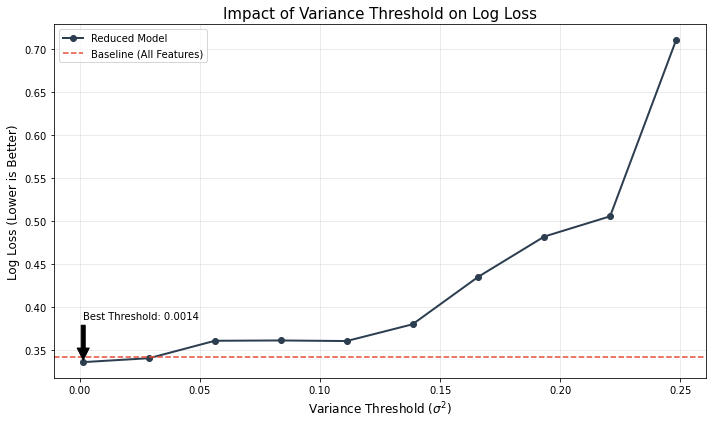

In [47]:
plt.figure(figsize=(10, 6))

# 1. Plot the Log Loss for each threshold
plt.plot(threshold_ranges, results, marker='o', linestyle='-', color='#2c3e50', linewidth=2, label='Reduced Model')

# 2. Add a horizontal line for the Baseline Log Loss
# This makes it easy to see if the reduction actually helped
plt.axhline(y=baseline_log_loss, color='#e74c3c', linestyle='--', label='Baseline (All Features)')

# 3. Formatting
plt.title('Impact of Variance Threshold on Log Loss', fontsize=15)
plt.xlabel('Variance Threshold ($\sigma^2$)', fontsize=12)
plt.ylabel('Log Loss (Lower is Better)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# 4. Optional: Annotate the best threshold
best_idx = np.argmin(results)
plt.annotate(f'Best Threshold: {threshold_ranges[best_idx]:.4f}', 
             xy=(threshold_ranges[best_idx], results[best_idx]), 
             xytext=(threshold_ranges[best_idx], results[best_idx] + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.tight_layout()
plt.show()

Fit the model with the optimum threshold to the test data

In [76]:

# 1. Find the best threshold based on the lowest Log Loss from your results list
best_idx = np.argmin(results)
optimal_threshold = threshold_ranges[best_idx]
print(f"Optimal Variance Threshold: {optimal_threshold}")

# 2. Re-fit the selector using this specific threshold
final_selector = VarianceThreshold(threshold=optimal_threshold)

# 3. Transform your training and validation data
X_train_final = final_selector.fit_transform(X_train_processed)
X_val_final = final_selector.transform(X_val_processed)

# 4. Final fit of your best model (e.g., LogisticRegression or RandomForest)
# Using your tuned parameters from earlier

model_less_regularization.fit(X_train_final, y_train)

# Quick check on Validation Set
val_probs = baseline_model.predict_proba(X_val_final)
print(f"Final Validation Log Loss: {log_loss(y_val, val_probs):.4f}")

Optimal Variance Threshold: 0.0014275401132572063
Final Validation Log Loss: 0.3361


In [85]:
# 1. Transform the test data using the fitted selector
# (Note: Use transform, NOT fit_transform on test data!)
X_test_final = final_selector.transform(X_test_processed)

# 2. Generate the final predictions
test_predictions = model_less_regularization.predict(X_test_final)

# 3. Create the submission DataFrame

pred_df2 = pd.DataFrame({
    "ID": test_data["ID"],
    "Target": test_predictions
})


pred_df2

# 4. Save to CSV
pred_df2.to_csv('optimized_variance_submission1.csv', index=False)
print("Submission file 'optimized_variance_submission1.csv' created successfully!")

ValueError: X has 139 features per sample; expecting 69

In [78]:
# 1. Re-construct the feature names list (155 names)
# Get numeric names from your X_train columns
num_names = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Get categorical names from the fitted preprocessor
cat_pipeline = rf_model_pipe.named_steps['preprocessor'].transformers_[1][1]
ohe_step = cat_pipeline.named_steps['onehot']

if hasattr(ohe_step, 'get_feature_names_out'):
    cat_names = ohe_step.get_feature_names_out().tolist()
else:
    cat_names = ohe_step.get_feature_names().tolist()

# The full list of 155 features
true_feature_names = num_names + cat_names

# 2. Identify what was dropped by the 0.0014 threshold
mask = final_selector.get_support()
dropped_features = [name for name, kept in zip(true_feature_names, mask) if not kept]
kept_features = [name for name, kept in zip(true_feature_names, mask) if kept]

print(f"--- Successfully identified {len(dropped_features)} dropped features ---")
print(dropped_features)

--- Successfully identified 16 dropped features ---
['x1_Missing', 'x2_Missing', 'x3_Missing', 'x3_Refused', 'x4_Missing', 'x5_Missing', "x7_Don't know", 'x12_Don’t know or N/A', 'x22_Don’t know (Do not show)', 'x23_Don’t know (Do not show)', "x24_Don't know", 'x26_Don’t know (Do not show)', "x29_Don't know", 'x29_Don’t know (Do not show)', "x30_Don't know", 'x30_Don’t know (Do not show)']


In [79]:
train_data['Target'].value_counts(normalize=True)

Low       0.652942
Medium    0.298191
High      0.048867
Name: Target, dtype: float64

In [80]:
print("\nPrediction Distribution:")
print(pred_df2['Target'].value_counts(normalize=True))


Prediction Distribution:
Low       0.713929
Medium    0.248233
High      0.037838
Name: Target, dtype: float64


### Recursive Feature Elimination

In [81]:
from sklearn.feature_selection import RFE

# 1. Initialize the estimator (Random Forest is usually best for RFE rankings)
# We use a smaller n_estimators here to keep it fast
estimator = rf_model_pipe.named_steps['classifier']  # Extract the Random Forest from the pipeline
# 2. Initialize RFE
# n_features_to_select: how many columns you want to keep
# step: how many features to drop at each iteration (5 helps it run faster)
selector_rfe = RFE(estimator,
                   step=5, verbose=1)

# 3. Fit RFE on your VARIANCE-REDUCED data
# (X_train_final is the 139-column set we just created)
selector_rfe.fit(X_train_final, y_train)

# 4. Transform the data
X_train_rfe = selector_rfe.transform(X_train_final)
X_val_rfe = selector_rfe.transform(X_val_final)

print(f"RFE Complete. Reduced from {X_train_final.shape[1]} to {X_train_rfe.shape[1]} features.")

Fitting estimator with 139 features.
Fitting estimator with 134 features.
Fitting estimator with 129 features.
Fitting estimator with 124 features.
Fitting estimator with 119 features.
Fitting estimator with 114 features.
Fitting estimator with 109 features.
Fitting estimator with 104 features.
Fitting estimator with 99 features.
Fitting estimator with 94 features.
Fitting estimator with 89 features.
Fitting estimator with 84 features.
Fitting estimator with 79 features.
Fitting estimator with 74 features.
RFE Complete. Reduced from 139 to 69 features.


In [88]:
# 'kept_features' was our list of 139 names from the previous step
rfe_mask = selector_rfe.support_
elite_features = [name for name, kept in zip(kept_features, rfe_mask) if kept]

print("--- Top 10 Elite Features according to RFE ---")
print(elite_features[:29])

--- Top 10 Elite Features according to RFE ---
['owner_age', 'personal_income', 'business_expenses', 'business_turnover', 'business_age_years', 'business_age_months', 'x0_eswatini', 'x0_lesotho', 'x0_malawi', 'x0_zimbabwe', 'x1_Yes', 'x2_No', 'x2_Yes', 'x3_No', 'x3_Yes', 'x4_No', 'x4_Yes', 'x5_No', 'x5_Yes', 'x6_Have now', 'x6_Missing', 'x6_Never had', 'x7_Have now', 'x7_Missing', 'x8_Yes', 'x10_Male', 'x10_Missing', 'x11_No', 'x11_Yes, sometimes']


In [83]:
# Re-fit the final model on the 50 RFE features
model_less_regularization.fit(X_train_rfe, y_train)

# Check Validation Log Loss
rfe_val_probs = model_less_regularization.predict_proba(X_val_rfe)
print(f"RFE (Features) Validation Log Loss: {log_loss(y_val, rfe_val_probs):.4f}")

RFE (Features) Validation Log Loss: 0.3380


Optimal number of features: 29


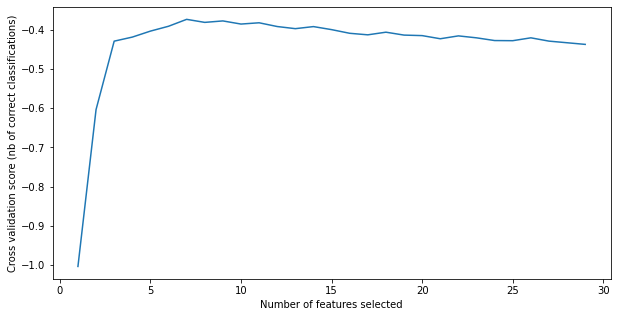

In [86]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# 1. Initialize RFECV
# This will try different numbers of features and pick the one with the best score
rfecv = RFECV(
    estimator=estimator, 
    step=5, 
    cv=StratifiedKFold(3), 
    scoring='neg_log_loss', 
    n_jobs=-1
)

# 2. Fit on the 139 features
rfecv.fit(X_train_final, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

# 3. Plot the progress to see where the 'sweet spot' was
plt.figure(figsize=(10, 5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [87]:
# 1. The best score is stored in grid_scores_ (usually as negative log loss)
best_score_idx = np.argmax(rfecv.grid_scores_)
cv_log_loss = -rfecv.grid_scores_[best_score_idx]

print(f"Optimal Number of Features: {rfecv.n_features_}")
print(f"Cross-Validated Log Loss for 49 features: {cv_log_loss:.4f}")

Optimal Number of Features: 29
Cross-Validated Log Loss for 49 features: 0.3738
